<a href="https://colab.research.google.com/github/callummcgirl/MarketingAnalytics/blob/main/MarketingAnalyticsCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind

In [ ]:
file_path = 'candy_crush.csv'
candy_crush_data = pd.read_csv(file_path)

candy_crush_data.head()

,user_id,gate,gamerounds_sum,retention_day,retention_week
0,116,30,3,False,False
1,337,30,38,True,False
2,377,50,165,True,False
3,483,50,1,False,False
4,488,50,179,True,True


In [ ]:
candy_crush_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         90189 non-null  int64
 1   gate            90189 non-null  int64
 2   gamerounds_sum  90189 non-null  int64
 3   retention_day   90189 non-null  bool 
 4   retention_week  90189 non-null  bool 
dtypes: bool(2), int64(3)
memory usage: 2.2 MB


In [ ]:
candy_crush_data.describe(include='all')

,user_id,gate,gamerounds_sum,retention_day,retention_week
count,9.018900e+04,90189.000000,90189.000000,90189,90189
unique,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,False,False
freq,NaN,NaN,NaN,50036,73408
mean,4.998412e+06,40.087483,51.872457,NaN,NaN
std,2.883286e+06,9.999673,195.050858,NaN,NaN
min,1.160000e+02,30.000000,0.000000,NaN,NaN
25%,2.512230e+06,30.000000,5.000000,NaN,NaN
50%,4.995815e+06,50.000000,16.000000,NaN,NaN
75%,7.496452e+06,50.000000,51.000000,NaN,NaN


In [ ]:
missing_data = candy_crush_data.isnull().sum()

missing_data

user_id           0
gate              0
gamerounds_sum    0
retention_day     0
retention_week    0
dtype: int64

In [ ]:
gate_distribution = candy_crush_data['gate'].value_counts()

gate_distribution


gate
50    45489
30    44700
Name: count, dtype: int64

In [ ]:
retention_day_rate = candy_crush_data['retention_day'].mean() * 100
retention_week_rate = candy_crush_data['retention_week'].mean() * 100

retention_day_rate, retention_week_rate

(44.52095044850259, 18.60648194347426)

#Statistical Analysis

In [ ]:
correlations = candy_crush_data.corr()

correlations

,user_id,gate,gamerounds_sum,retention_day,retention_week
user_id,1.000000,0.003730,0.001847,-0.002596,-0.002636
gate,0.003730,1.000000,-0.002967,-0.005941,-0.010537
gamerounds_sum,0.001847,-0.002967,1.000000,0.197603,0.279288
retention_day,-0.002596,-0.005941,0.197603,1.000000,0.327401
retention_week,-0.002636,-0.010537,0.279288,0.327401,1.000000


In [ ]:
correlation_gamerounds_day = correlations.loc['gamerounds_sum', 'retention_day']
correlation_gamerounds_week = correlations.loc['gamerounds_sum', 'retention_week']
correlation_gate_day = correlations.loc['gate', 'retention_day']
correlation_gate_week = correlations.loc['gate', 'retention_week']
correlation_day_week = correlations.loc['retention_day', 'retention_week']

correlation_results = {
    'Game Rounds vs One-Day Retention': correlation_gamerounds_day,
    'Game Rounds vs One-Week Retention': correlation_gamerounds_week,
    'Gate Placement vs One-Day Retention': correlation_gate_day,
    'Gate Placement vs One-Week Retention': correlation_gate_week,
    'One-Day vs One-Week Retention': correlation_day_week
}

correlation_results


{'Game Rounds vs One-Day Retention': 0.1976028643990605,
 'Game Rounds vs One-Week Retention': 0.2792877527789084,
 'Gate Placement vs One-Day Retention': -0.005940719598467524,
 'Gate Placement vs One-Week Retention': -0.010536805199357705,
 'One-Day vs One-Week Retention': 0.3274011572788649}

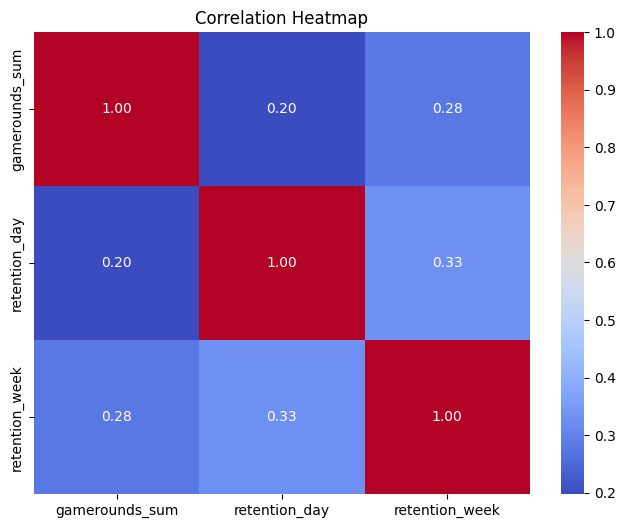

In [ ]:
candy_crush_data['retention_day'] = candy_crush_data['retention_day'].astype(int)
candy_crush_data['retention_week'] = candy_crush_data['retention_week'].astype(int)

candy_crush_data_reduced = candy_crush_data.drop(['user_id', 'gate'], axis=1)

correlation_matrix_reduced = candy_crush_data_reduced.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_reduced, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
candy_crush_data['engagement_segment'] = pd.qcut(candy_crush_data['gamerounds_sum'], 3, labels=['Low', 'Medium', 'High'])

segmented_retention_day = candy_crush_data.groupby('engagement_segment')['retention_day'].mean()
segmented_retention_week = candy_crush_data.groupby('engagement_segment')['retention_week'].mean()

retention_rates_table = pd.DataFrame({
    'Engagement': segmented_retention_day.index,
    'One-Day Retention Rate': segmented_retention_day.values,
    'One-Week Retention Rate': segmented_retention_week.values
})

retention_rates_table

,Engagement,One-Day Retention Rate,One-Week Retention Rate
0,Low,0.096295,0.015889
1,Medium,0.449384,0.083234
2,High,0.821369,0.470194


#EDA


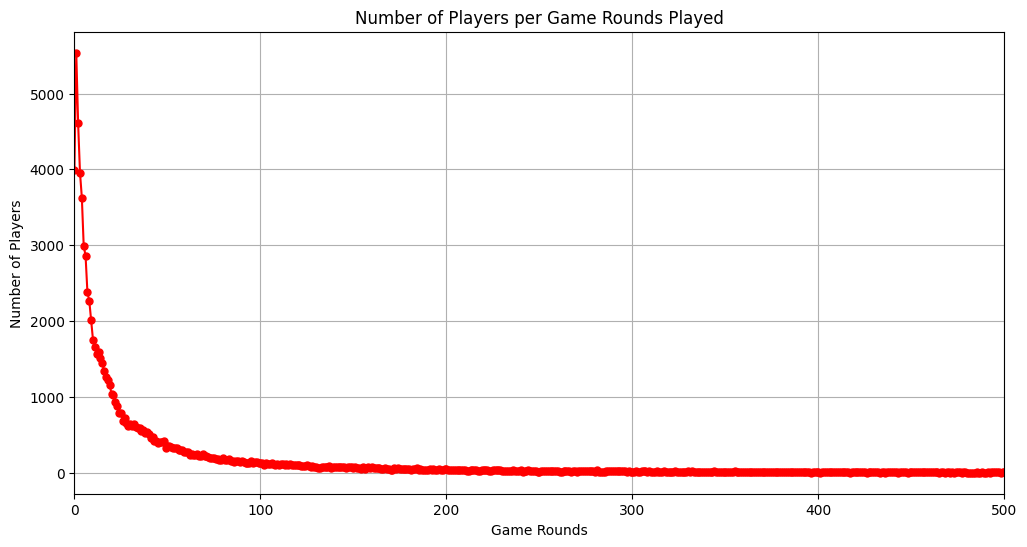

In [ ]:
rounds_count = candy_crush_data['gamerounds_sum'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(rounds_count.index, rounds_count.values, marker='o', linestyle='-', markersize=5, color='red')
plt.title('Number of Players per Game Rounds Played')
plt.xlabel('Game Rounds')
plt.ylabel('Number of Players')
plt.xlim(0, 500)  # Limit x-axis to 500 rounds played
plt.grid(True)
plt.show()


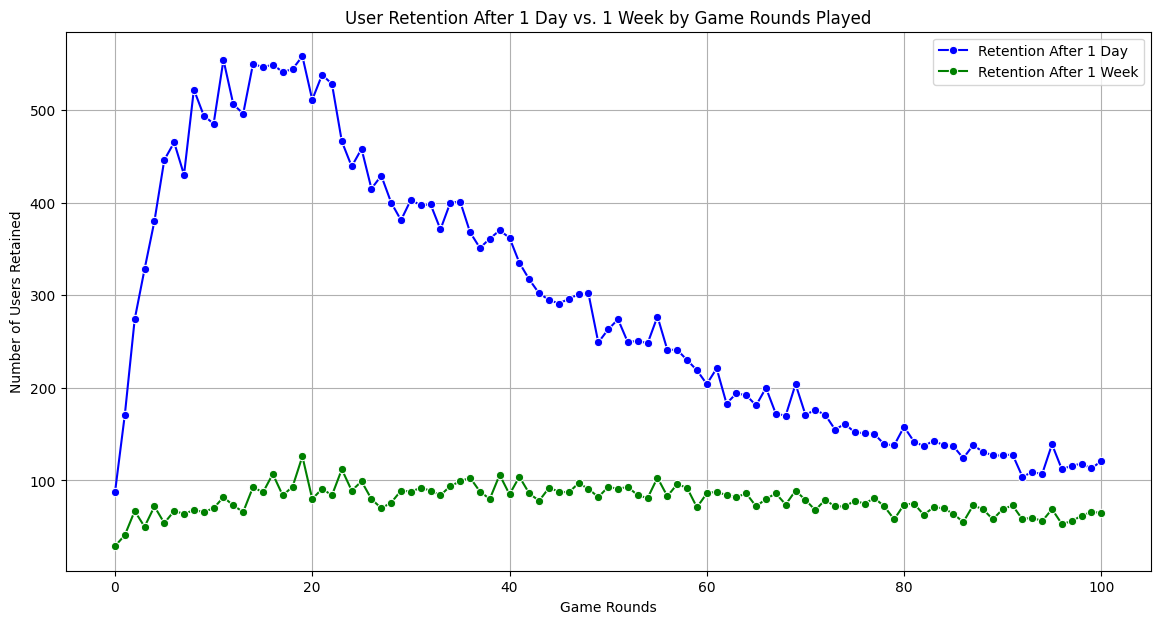

In [29]:
rounds_retention_df = candy_crush_data.groupby('gamerounds_sum').agg({
    'retention_day': 'sum',
    'retention_week': 'sum'
}).reset_index()

rounds_retention_df = rounds_retention_df[rounds_retention_df['gamerounds_sum'] <= 100]

plt.figure(figsize=(14, 7))
sns.lineplot(x='gamerounds_sum', y='retention_day', data=rounds_retention_df, color='blue', marker='o', label='Retention After 1 Day')
sns.lineplot(x='gamerounds_sum', y='retention_week', data=rounds_retention_df, color='green', marker='o', label='Retention After 1 Week')
plt.title('User Retention After 1 Day vs. 1 Week by Game Rounds Played')
plt.xlabel('Game Rounds')
plt.ylabel('Number of Users Retained')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
gate_30_data = candy_crush_data[candy_crush_data['gate'] == 30]
gate_50_data = candy_crush_data[candy_crush_data['gate'] == 50]

# Descriptive Statistics for gate 30
gate_30_descriptive_stats = gate_30_data['gamerounds_sum'].describe()

# Descriptive Statistics for gate 50
gate_50_descriptive_stats = gate_50_data['gamerounds_sum'].describe()


In [ ]:
gate_30_descriptive_stats, gate_50_descriptive_stats

(count    44700.000000
 mean        52.456264
 std        256.716423
 min          0.000000
 25%          5.000000
 50%         17.000000
 75%         50.000000
 max      49854.000000
 Name: gamerounds_sum, dtype: float64,
 count    45489.000000
 mean        51.298776
 std        103.294416
 min          0.000000
 25%          5.000000
 50%         16.000000
 75%         52.000000
 max       2640.000000
 Name: gamerounds_sum, dtype: float64)

In [ ]:
retention_day_gate_30 = gate_30_data['retention_day'].mean()
retention_day_gate_50 = gate_50_data['retention_day'].mean()
retention_week_gate_30 = gate_30_data['retention_week'].mean()
retention_week_gate_50 = gate_50_data['retention_week'].mean()

In [ ]:
retention_rate_comparison = pd.DataFrame({
    'Gate Level': ['Level 30', 'Level 50'],
    'One-Day Retention Rate': [retention_day_gate_30, retention_day_gate_50],
    'One-Week Retention Rate': [retention_week_gate_30, retention_week_gate_50]
})

retention_rate_comparison

,Gate Level,One-Day Retention Rate,One-Week Retention Rate
0,Level 30,0.448188,0.190201
1,Level 50,0.442283,0.182000


#Chi-Square Test

In [ ]:
contingency_table_one_day = pd.crosstab(candy_crush_data['gate'], candy_crush_data['retention_day'])
contingency_table_one_week = pd.crosstab(candy_crush_data['gate'], candy_crush_data['retention_week'])

chi2_test_result_one_day = chi2_contingency(contingency_table_one_day)
chi2_test_result_one_week = chi2_contingency(contingency_table_one_week)

In [ ]:
chi2_test_results_one_day = pd.DataFrame({
    'Chi-Square Statistic': [chi2_test_result_one_day[0]],
    'p-value': [chi2_test_result_one_day[1]]
}, index=['One-Day Retention'])

chi2_test_results_one_day


,Chi-Square Statistic,p-value
One-Day Retention,3.159101,0.075505


In [ ]:
chi2_test_results_one_week = pd.DataFrame({
    'Chi-Square Statistic': [chi2_test_result_one_week[0]],
    'p-value': [chi2_test_result_one_week[1]]
}, index=['One-Week Retention'])

chi2_test_results_one_week

,Chi-Square Statistic,p-value
One-Week Retention,9.959087,0.001601


In [ ]:
combined_chi2_results = pd.DataFrame({
    'Chi-Square Statistic': [chi2_test_result_one_day[0], chi2_test_result_one_week[0]],
    'p-value': [chi2_test_result_one_day[1], chi2_test_result_one_week[1]]
}, index=['One-Day Retention', 'One-Week Retention'])

combined_chi2_results


,Chi-Square Statistic,p-value
One-Day Retention,3.159101,0.075505
One-Week Retention,9.959087,0.001601


#T-Tests

In [ ]:
group_30 = candy_crush_data[candy_crush_data['gate'] == 30]
group_50 = candy_crush_data[candy_crush_data['gate'] == 50]

t_test_one_day = ttest_ind(group_30['retention_day'], group_50['retention_day'], equal_var=False)
t_test_one_week = ttest_ind(group_30['retention_week'], group_50['retention_week'], equal_var=False)

t_test_one_day, t_test_one_week


(TtestResult(statistic=1.7840774867039824, pvalue=0.07441443713953834, df=90155.1121325518),
 TtestResult(statistic=3.164028946774232, pvalue=0.001556530181006652, df=90079.82814000268))

In [ ]:
t_test_results = pd.DataFrame({
    "Metric": ["One-Day Retention", "One-Week Retention"],
    "T-statistic": [t_test_one_day.statistic, t_test_one_week.statistic],
    "P-value": [t_test_one_day.pvalue, t_test_one_week.pvalue]
})

t_test_results


,Metric,T-statistic,P-value
0,One-Day Retention,1.784077,0.074414
1,One-Week Retention,3.164029,0.001557
